DATA COLLECTION AND DESCRIPTION OF DATASET

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
#creating a function to generate report of the model

def generate_model_report(y_actual,y_predicted):
  print("Accuracy = ",accuracy_score(y_actual, y_predicted))
  print("Precision = ",precision_score(y_actual, y_predicted))
  print("Recall = ",recall_score(y_actual, y_predicted))
  print("F1 score = ",f1_score(y_actual, y_predicted))
  pass

In [4]:
#importing dataset

data = pd.read_csv("stroke-data.csv")

In [5]:
#displaying First ten data from the dataset

print("\nHEAD:\n")
data.head(10)


HEAD:



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [6]:
#shape of a Dataset
data.shape

(4981, 11)

In [7]:
#The info() method prints information about the Dataset.
print("\nINFO:\n")
data.info()


INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [8]:
#The describe() method returns description of the data in the Dataset.
print("\nDESCRIBE:\n")
data1 = data
data1.describe()


DESCRIBE:



,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


CLEANING DATASET

In [9]:
#checking for null value
print(data.isna())

      gender    age  hypertension  heart_disease  ever_married  work_type  \
0      False  False         False          False         False      False   
1      False  False         False          False         False      False   
2      False  False         False          False         False      False   
3      False  False         False          False         False      False   
4      False  False         False          False         False      False   
...      ...    ...           ...            ...           ...        ...   
4976   False  False         False          False         False      False   
4977   False  False         False          False         False      False   
4978   False  False         False          False         False      False   
4979   False  False         False          False         False      False   
4980   False  False         False          False         False      False   

      Residence_type  avg_glucose_level    bmi  smoking_status  stroke  
0 

In [10]:
#total number of null values present in the dataset
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

DATA ANALYSIS

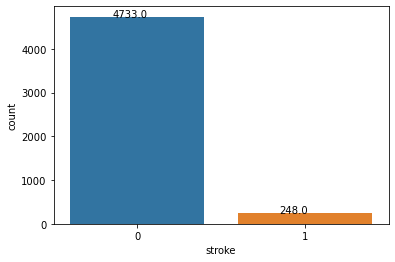

In [11]:
#determining number of people who got stroke 
a = sns.countplot(x="stroke", data=data)
for p in a.patches:
   a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()


In [12]:
#determines how many times the zeroes and ones are repeated.
data['stroke'].value_counts()

#0 means people does not have chance of stroke
#1 means people with chance of stroke

0    4733
1     248
Name: stroke, dtype: int64

DATA VISUALIZATION

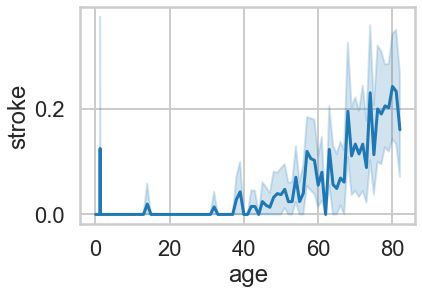

In [14]:
#line graph showing how the risk of stroke rises with age
sns.lineplot(x="age",y="stroke",data=data)
sns.set_style("whitegrid") 
sns.set_context("poster")
plt.show()

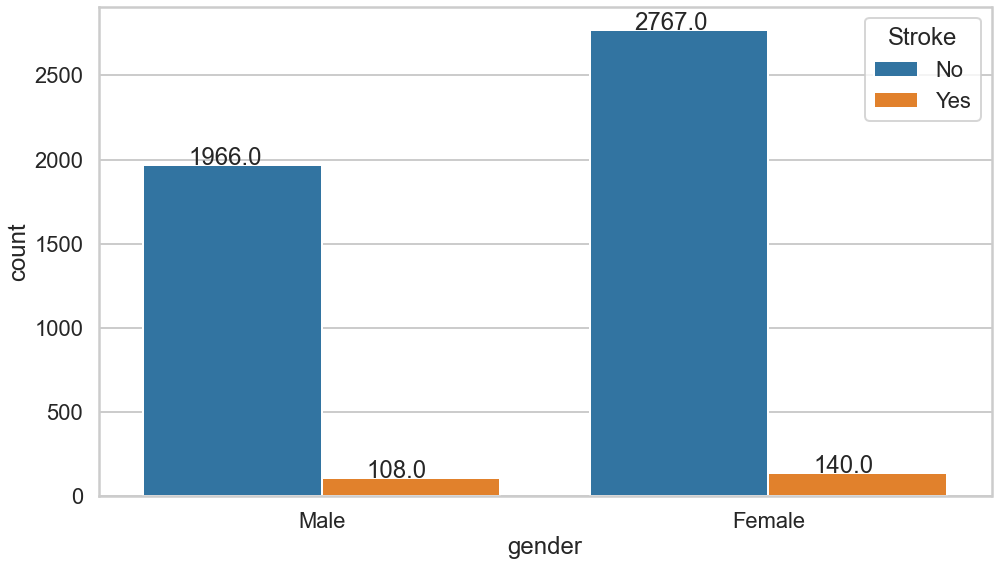

In [15]:
#gender-based countplot indicating whether or not patients had strokes
plt.figure(figsize=(16,9))
a=sns.countplot(x ='gender', hue = "stroke", data = data)
for p in a.patches:
   a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.legend(['No','Yes'],title="Stroke")
plt.show()

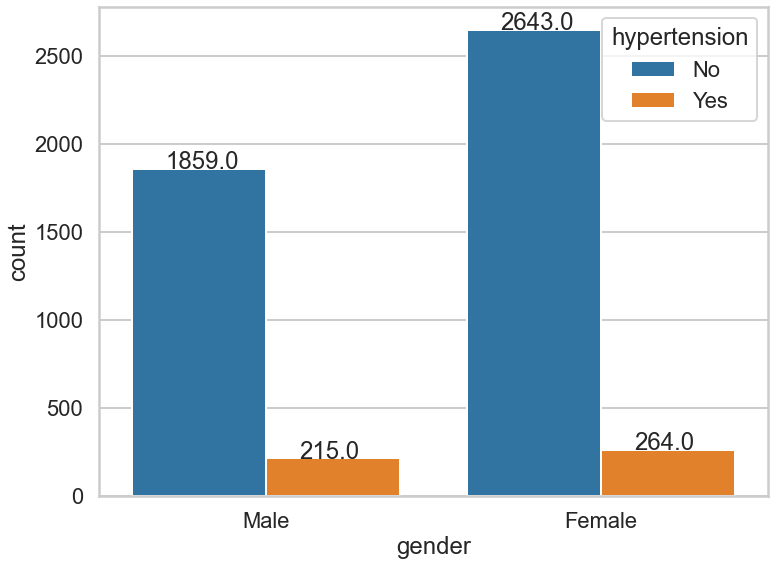

In [17]:
#gender-based countplot indicating whether or not patients have hypertension
plt.figure(figsize=(12,9))
a=sns.countplot(x ='gender', hue = "hypertension", data = data)
for p in a.patches:
   a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.legend(['No','Yes'],title="hypertension")
plt.show()

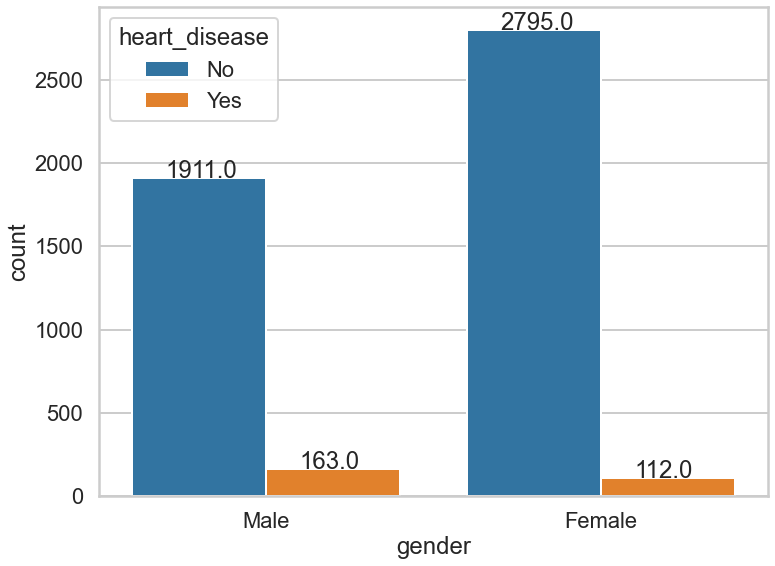

In [18]:
#gender-based countplot indicating whether or not patients have heart disease
plt.figure(figsize=(12,9))
a=sns.countplot(x ='gender', hue = "heart_disease", data = data)
for p in a.patches:
   a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.legend(['No','Yes'],title="heart_disease")
plt.show()

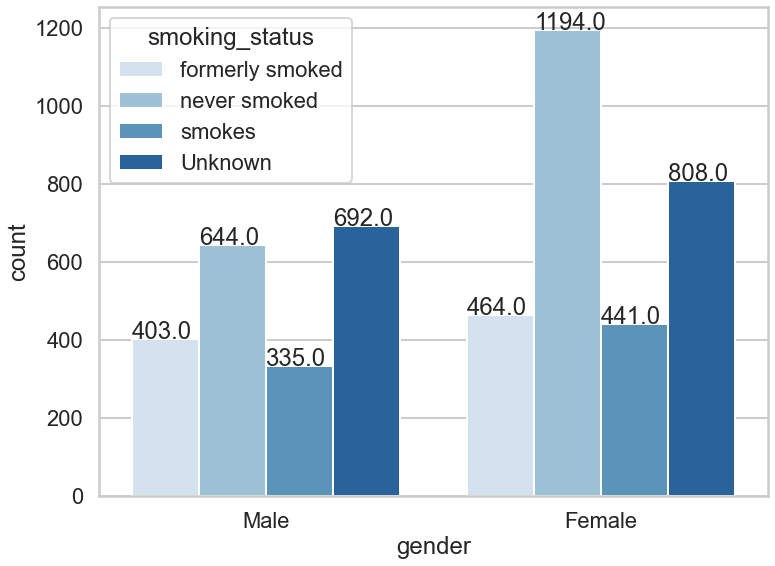

In [19]:
#gender-based countplot indicating their smoking status
plt.figure(figsize=(12,9))
a=sns.countplot(x ='gender', hue = "smoking_status", data = data, palette = "Blues")
for p in a.patches:
   a.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
plt.show()

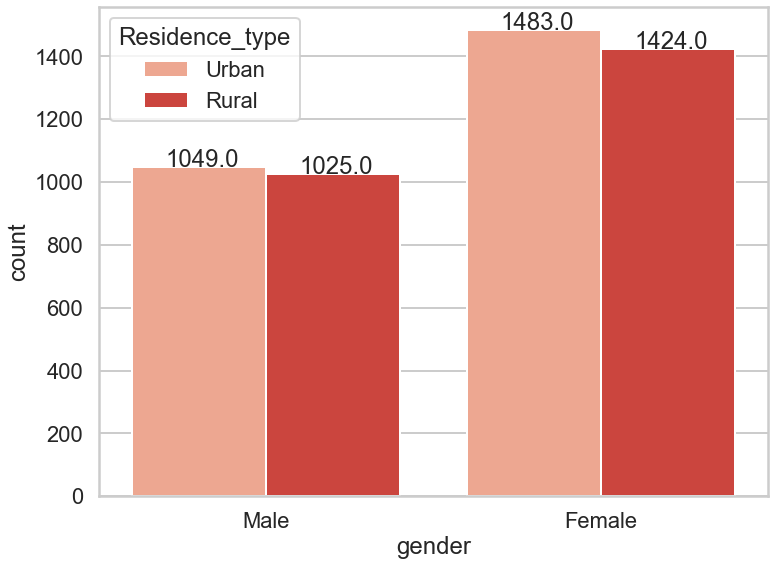

In [20]:
#gender-based countplot reflecting their type of residence
plt.figure(figsize=(12,9))
a=sns.countplot(x ='gender', hue = "Residence_type", data = data,palette = "Reds")
for p in a.patches:
   a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.show()

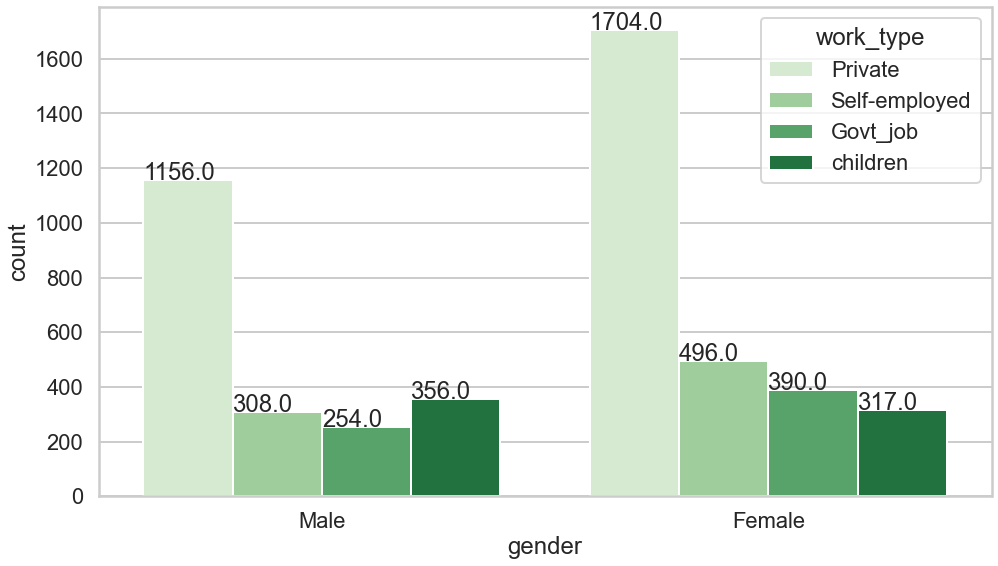

In [21]:
#gender-based countplot indicating their work type
plt.figure(figsize=(16,9))
a=sns.countplot(x ='gender', hue = "work_type", data = data,palette = "Greens")
for p in a.patches:
   a.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
plt.show()

LABEL ENCODING

In [44]:
#LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels to numerical labels. 
from sklearn.preprocessing import LabelEncoder 
enc = LabelEncoder()
gender=enc.fit_transform(data['gender'])
data['gender']=gender

ever_married=enc.fit_transform(data['ever_married'])
data['ever_married']=ever_married

work_type=enc.fit_transform(data['work_type'])
data['work_type']=work_type

Residence_type=enc.fit_transform(data['Residence_type'])
data['Residence_type']=Residence_type

smoking_status=enc.fit_transform(data['smoking_status'])
data['smoking_status']=smoking_status

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


SPLITTING DATA FOR TEST AND TRAIN

In [45]:
target='stroke'

x=data.loc[:, data.columns!=target] #all columns except stroke
y=data.loc[:, data.columns==target] #only stroke column

In [56]:
#training is 80%, testing is 20%

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

0    4733
1     248
Name: stroke, dtype: int64


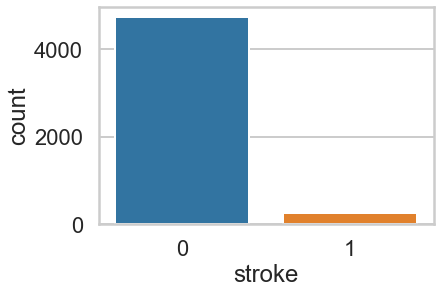

In [57]:
#determining number of people who got stroke 
a=sns.countplot(x=target,data=data)

#0 means people does not have chance of stroke
#1 means people with chance of stroke
print(data[target].value_counts())

THIS IS HIGHLY IMBALANCED DATASET, SO WHATEVER MODEL YOU BUILD WOULD BE BIASED TO 0(i.e. greater higher number of values)

In [58]:
y_train[target].value_counts()

0    3786
1     198
Name: stroke, dtype: int64

LOGISTIC REGRESSION

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#fitting logistic regression
logreg.fit(x_train,y_train)

LogisticRegression()

In [60]:
y_test_pred = logreg.predict(x_test)

#generating model report
generate_model_report(y_test,y_test_pred)

Accuracy =  0.9498495486459378
Precision =  0.5
Recall =  0.02
F1 score =  0.038461538461538464


UNDER SAMPLING: correcting imbalanced data to reduce the risk of their analysis or machine learning algorithm skewing toward the majority

In [61]:
#minority class is 1, majority is 0

#finding length of value 1
minority_class=len(data[data[target]==1])
print(minority_class)

248


In [62]:
#printing indices of wherever 0 occurs

majority_class_index=data[data[target]==0].index
print(majority_class_index)

Int64Index([ 208,  209,  210,  211,  212,  213,  214,  215,  216,  217,
            ...
            4971, 4972, 4973, 4974, 4975, 4976, 4977, 4978, 4979, 4980],
           dtype='int64', length=4733)


In [63]:
#Random Undersampling (RUS) is one of resampling approaches to tackle issues with imbalance data by removing instances randomly from the majority class.

random_majority = np.random.choice(majority_class_index, minority_class, replace=False)
print(len(random_majority))

248


In [64]:
##printing indices of wherever 1 occurs

minority_class_index = data[data[target]==1].index
print(minority_class_index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4810, 4811, 4812, 4813, 4814, 4815, 4816, 4817, 4818, 4819],
           dtype='int64', length=248)


In [65]:
under_sample_index = np.concatenate([minority_class_index,random_majority])

In [66]:
under_sample=data.loc[under_sample_index]

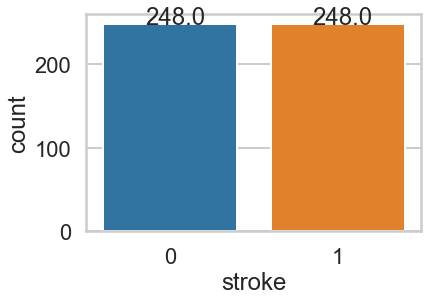

In [67]:
a = sns.countplot(x=target, data=under_sample)
for p in a.patches:
   a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [70]:
x = under_sample.loc[:, data.columns!=target]
y = under_sample.loc[:, data.columns==target]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

logreg = LogisticRegression().fit(x_train,y_train)

y_test_pred=logreg.predict(x_test)

In [72]:
generate_model_report(y_test,y_test_pred)

Accuracy =  0.8
Precision =  0.8085106382978723
Recall =  0.7755102040816326
F1 score =  0.7916666666666665


CONFUSION MATRIX

In [73]:
#confusion matrix

from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(y_test,y_test_pred)
print(cmat)

[[42  9]
 [11 38]]


In [74]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  42
False Positives:  9
False Negatives:  11
True Positives:  38


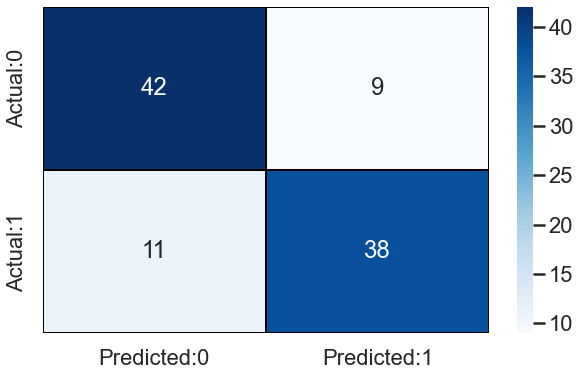

In [75]:
cmat = pd.DataFrame(data = cmat,columns = ['Predicted:0', 'Predicted:1'],index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(cmat, annot = True, fmt = 'd', cmap = "Blues", linecolor="Black", linewidths=1.5) 
plt.show() 

In [76]:
#classification report
from sklearn.metrics import classification_report
target_names = ['Person does not have chances of stroke', 'Person has chances of stroke']
print(classification_report(y_test,y_test_pred, target_names=target_names))

                                        precision    recall  f1-score   support

Person does not have chances of stroke       0.79      0.82      0.81        51
          Person has chances of stroke       0.81      0.78      0.79        49

                              accuracy                           0.80       100
                             macro avg       0.80      0.80      0.80       100
                          weighted avg       0.80      0.80      0.80       100

